Importing necessary libraries

In [1]:
#!pip install numpy pandas matplotlib scikit-learn -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

#Overall

Loading data

In [2]:
df = pd.read_csv(r'data.csv')
df

,Year,Population,Waste Generated (TPD),Waste Collected (TPD),Waste Processed (TPD),Waste Landfilled (TPD)
0,2016-17,168162,76.04,62.10,11.050,52.050
1,2017-18,168162,73.34,63.00,7.500,51.000
2,2018-19,168162,75.10,67.10,13.050,51.400
3,2019-20,154762,74.70,74.60,12.560,62.032
4,2020-21,154762,71.90,71.90,20.350,51.550
5,2021-22,151458,65.50,65.50,17.500,48.000
6,2022-23,147695,68.85,68.85,23.782,45.068
7,2023-24,147695,69.68,69.68,36.570,33.110


Basic Gist of the data

In [3]:
df.describe()

,Population,Waste Generated (TPD),Waste Collected (TPD),Waste Processed (TPD),Waste Landfilled (TPD)
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,157607.250000,71.888750,67.841250,17.795250,49.276250
std,9139.535886,3.634814,4.292573,9.230092,8.139325
min,147695.000000,65.500000,62.100000,7.500000,33.110000
25%,150517.250000,69.472500,64.875000,12.182500,47.267000
50%,154762.000000,72.620000,67.975000,15.275000,51.200000
75%,168162.000000,74.800000,70.235000,21.208000,51.675000
max,168162.000000,76.040000,74.600000,36.570000,62.032000


Data Compilation

In [4]:
df.columns = ['Year', 'Population', 'Generated', 'Collected', 'Processed', 'Landfilled']

In [5]:
df["Growth Rate (%)"] = df["Generated"].pct_change() * 100
df['Efficiency (%)'] = ((df['Processed'] + df['Landfilled'])/df['Generated'])*100
df['Per Capita Waste (kg/day)'] = (df['Generated']*1000)/df['Population']
df['Landfill Dependency (%)'] = (df['Landfilled']/df['Generated'])*100
df['Processing Focus (%)'] = (df['Processed']/df['Generated'])*100
df['Collection - Processing Gap (TPD)'] = df['Collected']-(df['Processed']+df['Landfilled'])

In [6]:
df

,Year,Population,Generated,Collected,Processed,Landfilled,Growth Rate (%),Efficiency (%),Per Capita Waste (kg/day),Landfill Dependency (%),Processing Focus (%),Collection - Processing Gap (TPD)
0,2016-17,168162,76.04,62.10,11.050,52.050,NaN,82.982641,0.452183,68.450815,14.531825,-1.000
1,2017-18,168162,73.34,63.00,7.500,51.000,-3.550763,79.765476,0.436127,69.539133,10.226343,4.500
2,2018-19,168162,75.10,67.10,13.050,51.400,2.399782,85.818908,0.446593,68.442077,17.376831,2.650
3,2019-20,154762,74.70,74.60,12.560,62.032,-0.532623,99.855422,0.482677,83.041499,16.813922,0.008
4,2020-21,154762,71.90,71.90,20.350,51.550,-3.748327,100.000000,0.464584,71.696801,28.303199,0.000
5,2021-22,151458,65.50,65.50,17.500,48.000,-8.901252,100.000000,0.432463,73.282443,26.717557,0.000
6,2022-23,147695,68.85,68.85,23.782,45.068,5.114504,100.000000,0.466163,65.458243,34.541757,0.000
7,2023-24,147695,69.68,69.68,36.570,33.110,1.205519,100.000000,0.471783,47.517222,52.482778,0.000


Plotting a graph

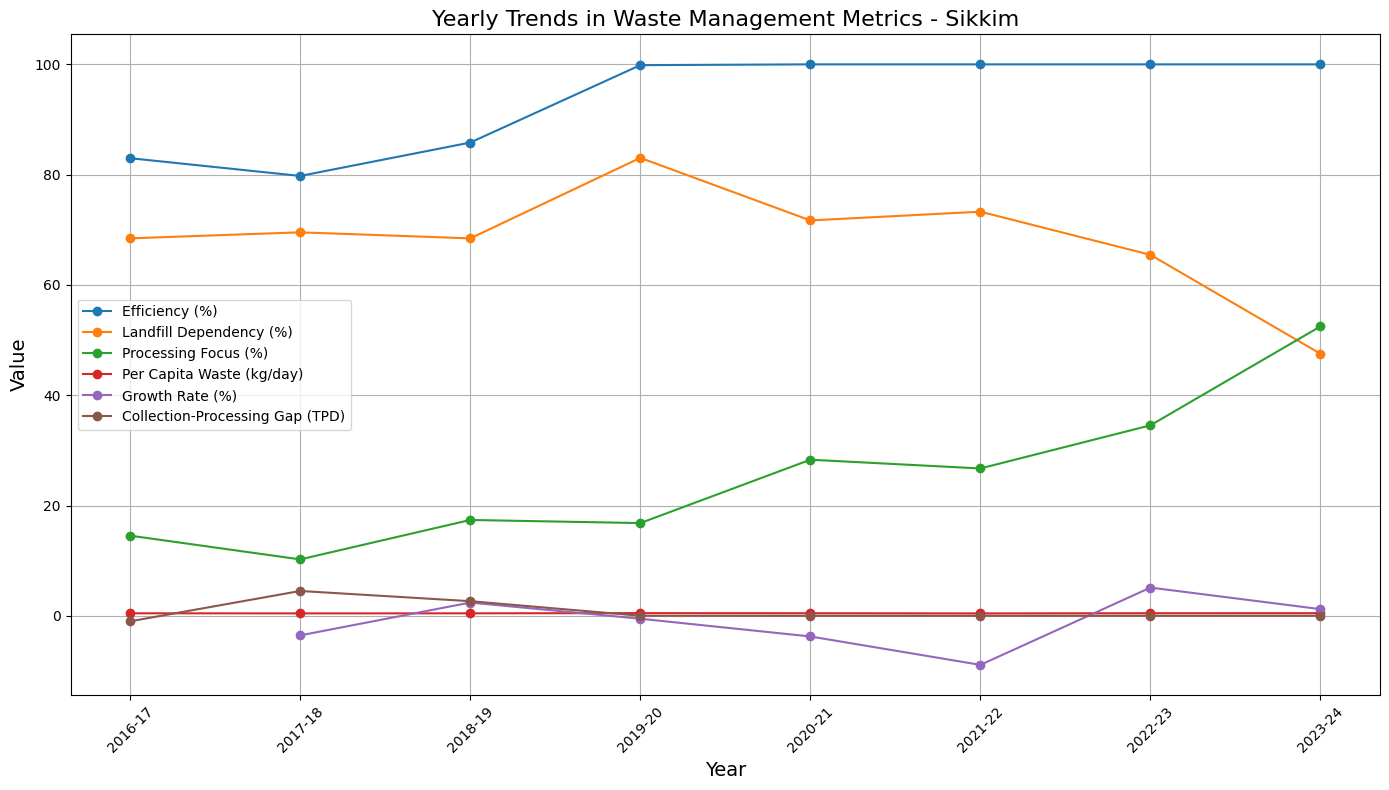

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['Efficiency (%)'], marker='o', label='Efficiency (%)')
plt.plot(df['Year'], df['Landfill Dependency (%)'], marker='o', label='Landfill Dependency (%)')
plt.plot(df['Year'], df['Processing Focus (%)'], marker='o', label='Processing Focus (%)')
plt.plot(df['Year'], df['Per Capita Waste (kg/day)'], marker='o', label='Per Capita Waste (kg/day)')
plt.plot(df['Year'], df['Growth Rate (%)'], marker='o', label='Growth Rate (%)')
plt.plot(df['Year'], df['Collection - Processing Gap (TPD)'], marker='o', label='Collection-Processing Gap (TPD)')


# Customize plot
plt.title("Yearly Trends in Waste Management Metrics - Sikkim", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

Predicting further till 2030

In [8]:
# Clean up 'Year' (e.g., 2016-17 -> 2017)
df['Year'] = df['Year'].astype(str).str[:4].astype(int)
df

,Year,Population,Generated,Collected,Processed,Landfilled,Growth Rate (%),Efficiency (%),Per Capita Waste (kg/day),Landfill Dependency (%),Processing Focus (%),Collection - Processing Gap (TPD)
0,2016,168162,76.04,62.10,11.050,52.050,NaN,82.982641,0.452183,68.450815,14.531825,-1.000
1,2017,168162,73.34,63.00,7.500,51.000,-3.550763,79.765476,0.436127,69.539133,10.226343,4.500
2,2018,168162,75.10,67.10,13.050,51.400,2.399782,85.818908,0.446593,68.442077,17.376831,2.650
3,2019,154762,74.70,74.60,12.560,62.032,-0.532623,99.855422,0.482677,83.041499,16.813922,0.008
4,2020,154762,71.90,71.90,20.350,51.550,-3.748327,100.000000,0.464584,71.696801,28.303199,0.000
5,2021,151458,65.50,65.50,17.500,48.000,-8.901252,100.000000,0.432463,73.282443,26.717557,0.000
6,2022,147695,68.85,68.85,23.782,45.068,5.114504,100.000000,0.466163,65.458243,34.541757,0.000
7,2023,147695,69.68,69.68,36.570,33.110,1.205519,100.000000,0.471783,47.517222,52.482778,0.000


Define features and future years

In [9]:
X = df[['Year']]
future_years = pd.DataFrame({'Year': list(range(df['Year'].max()+1, 2031))})

In [10]:
# Columns to predict
metrics = ['Generated', 'Collected', 'Processed', 'Landfilled', 'Efficiency (%)', 'Per Capita Waste (kg/day)', 'Landfill Dependency (%)', 'Processing Focus (%)', 'Collection - Processing Gap (TPD)']

In [11]:
# Dictionary to store predictions
predictions = {'Year': future_years['Year']}

Training Linear Regression Model on given 10 years data

In [12]:
for metric in metrics:
    model = LinearRegression()
    model.fit(X, df[metric])
    y_pred = model.predict(future_years[['Year']])
    predictions[metric] = y_pred

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions)

# Combine actual and predicted
combined_df = pd.concat([df[['Year'] + metrics], pred_df], ignore_index=True)

Predicted Data

In [13]:
pred_df

,Year,Generated,Collected,Processed,Landfilled,Efficiency (%),Per Capita Waste (kg/day),Landfill Dependency (%),Processing Focus (%),Collection - Processing Gap (TPD)
0,2024,66.608214,71.848929,32.8590,39.476857,107.641127,0.468727,59.655500,47.985627,-0.486929
1,2025,65.434762,72.739524,36.2065,37.299214,110.771865,0.471428,57.705938,53.065927,-0.766190
2,2026,64.261310,73.630119,39.5540,35.121571,113.902603,0.474129,55.756376,58.146227,-1.045452
3,2027,63.087857,74.520714,42.9015,32.943929,117.033341,0.476831,53.806814,63.226527,-1.324714
4,2028,61.914405,75.411310,46.2490,30.766286,120.164079,0.479532,51.857252,68.306827,-1.603976
5,2029,60.740952,76.301905,49.5965,28.588643,123.294817,0.482233,49.907690,73.387127,-1.883238
6,2030,59.567500,77.192500,52.9440,26.411000,126.425554,0.484934,47.958128,78.467427,-2.162500


Predicted Data along with actual data (2016-2023)

In [14]:
combined_df

,Year,Generated,Collected,Processed,Landfilled,Efficiency (%),Per Capita Waste (kg/day),Landfill Dependency (%),Processing Focus (%),Collection - Processing Gap (TPD)
0,2016,76.040000,62.100000,11.0500,52.050000,82.982641,0.452183,68.450815,14.531825,-1.000000
1,2017,73.340000,63.000000,7.5000,51.000000,79.765476,0.436127,69.539133,10.226343,4.500000
2,2018,75.100000,67.100000,13.0500,51.400000,85.818908,0.446593,68.442077,17.376831,2.650000
3,2019,74.700000,74.600000,12.5600,62.032000,99.855422,0.482677,83.041499,16.813922,0.008000
4,2020,71.900000,71.900000,20.3500,51.550000,100.000000,0.464584,71.696801,28.303199,0.000000
5,2021,65.500000,65.500000,17.5000,48.000000,100.000000,0.432463,73.282443,26.717557,0.000000
6,2022,68.850000,68.850000,23.7820,45.068000,100.000000,0.466163,65.458243,34.541757,0.000000
7,2023,69.680000,69.680000,36.5700,33.110000,100.000000,0.471783,47.517222,52.482778,0.000000
8,2024,66.608214,71.848929,32.8590,39.476857,107.641127,0.468727,59.655500,47.985627,-0.486929
9,2025,65.434762,72.739524,36.2065,37.299214,110.771865,0.471428,57.705938,53.065927,-0.766190


Plotting the predicted data

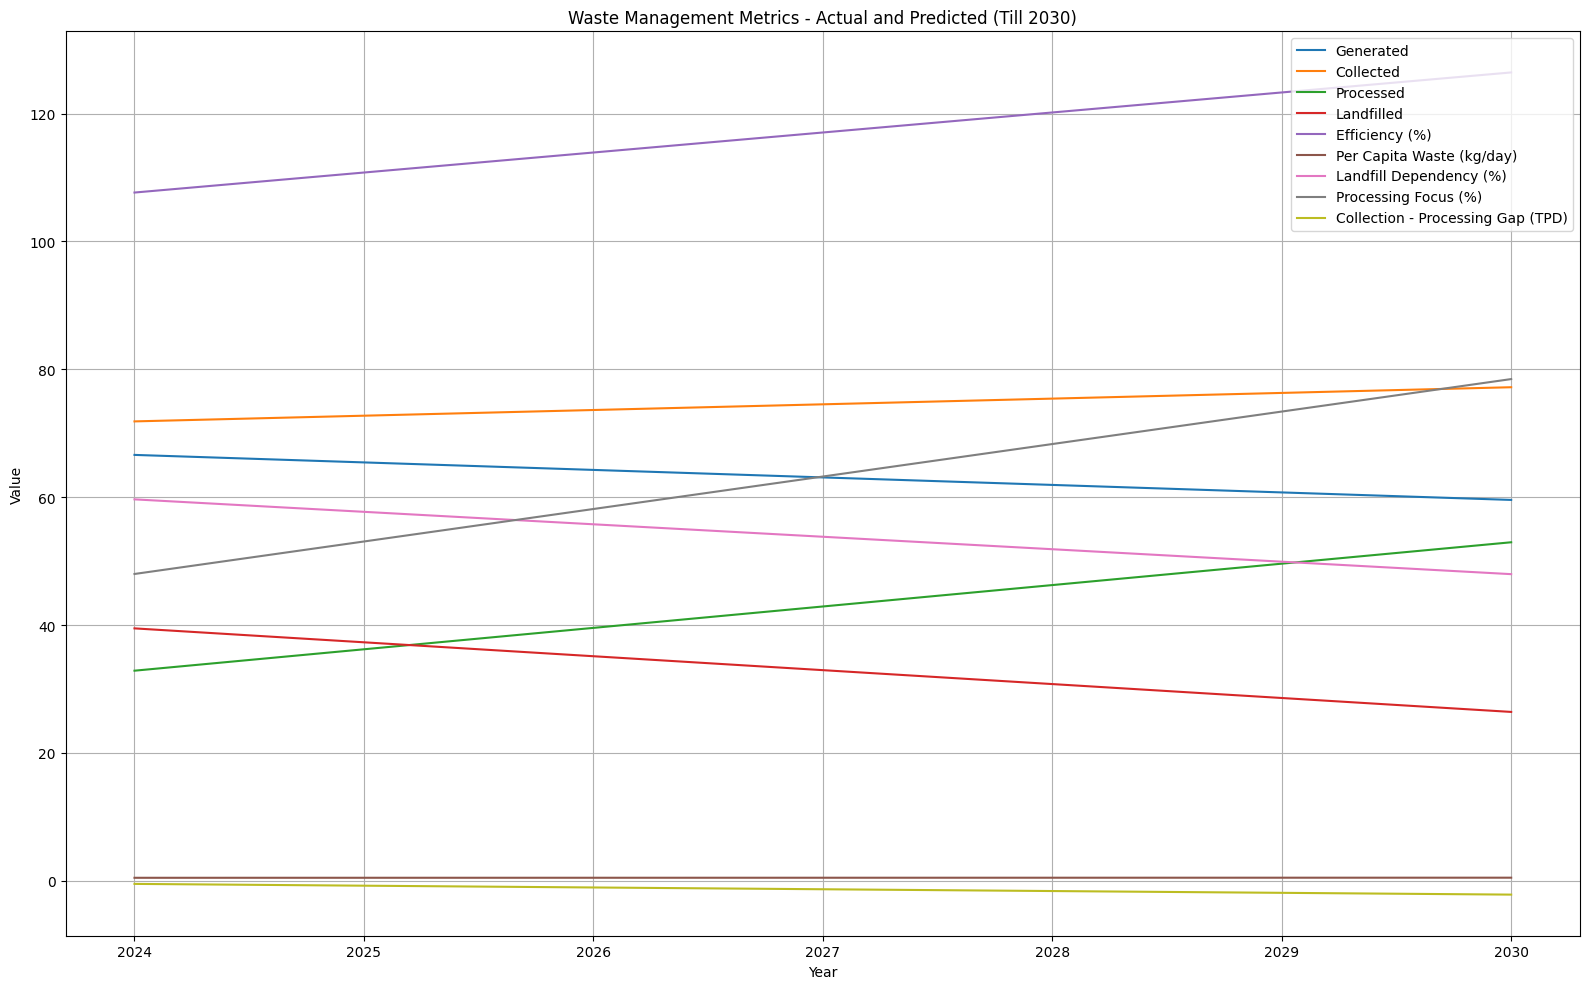

In [15]:
plt.figure(figsize=(16, 10))
for metric in metrics:
    plt.plot(pred_df['Year'], pred_df[metric], label=metric)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Waste Management Metrics - Actual and Predicted (Till 2030)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the predicted data in continuation to the with actual data

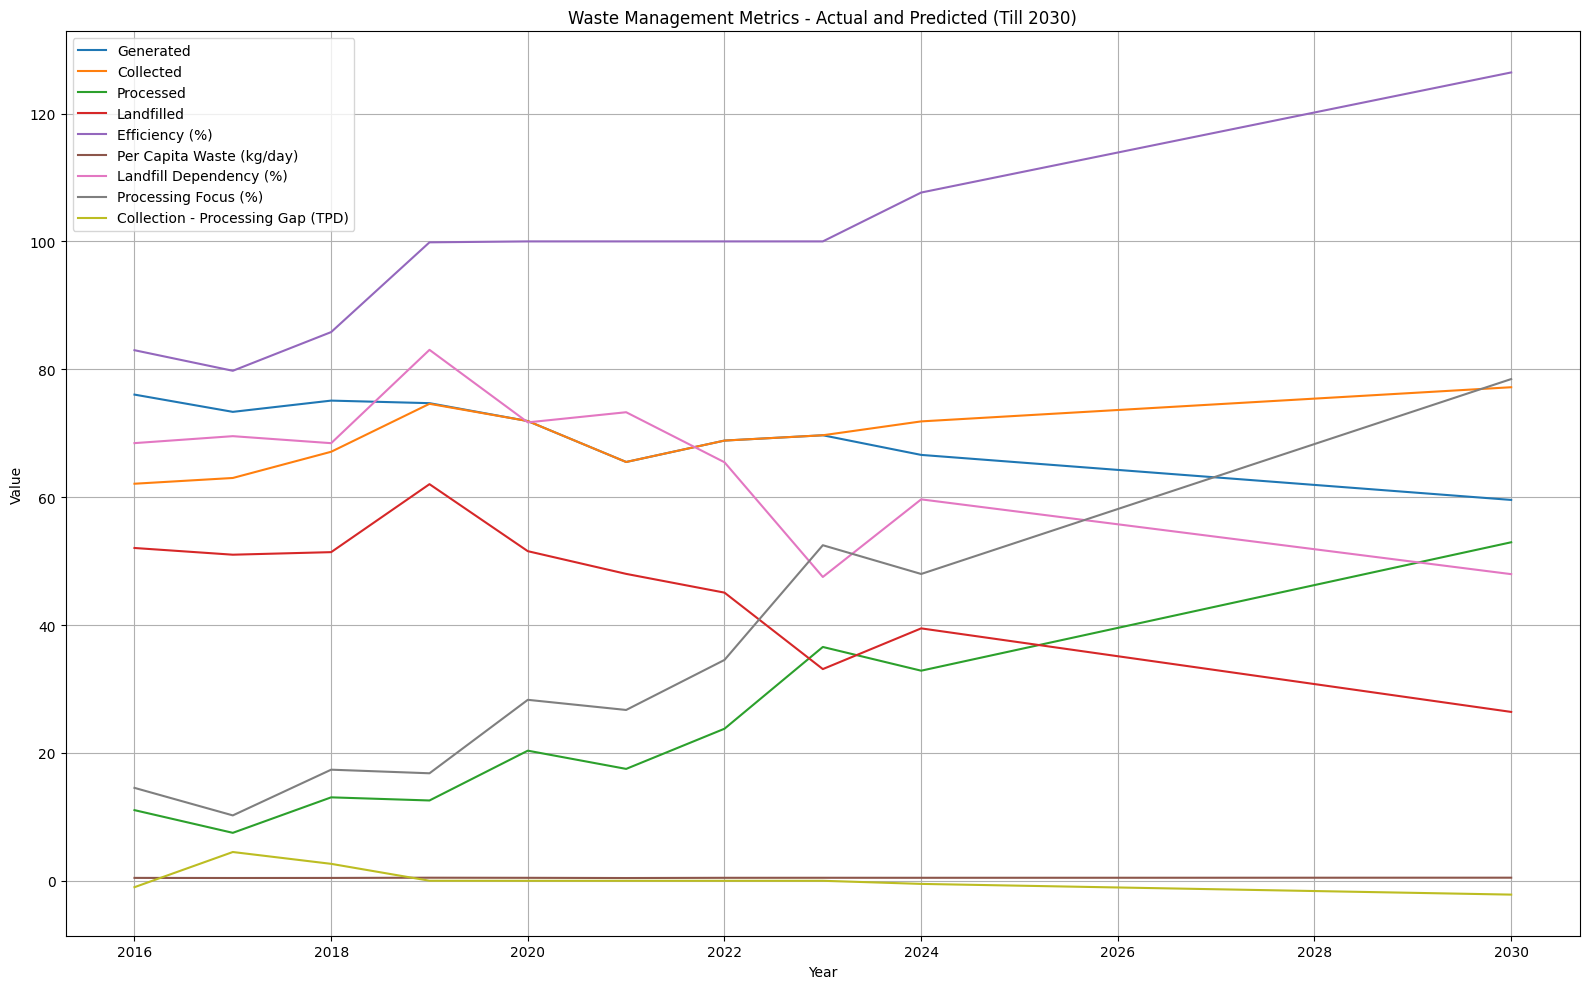

In [16]:
plt.figure(figsize=(16, 10))
for metric in metrics:
    plt.plot(combined_df['Year'], combined_df[metric], label=metric)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Waste Management Metrics - Actual and Predicted (Till 2030)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Local Body wise (for 2023-24)


Loading data

In [17]:
df = pd.read_csv('data1.csv')
df

,Sr. No.,Name of ULB,Population,Solid Waste Generated (TPD),Solid Waste Collected (TPD),Solid Waste Treated (TPD),Waste Landfilled
0,1,Gangtok Municipal Corporation (GMC),100286,49.12,49.12,24.08,25.04
1,2,Gyalshing Municipal Corporation (GyMC),4013,2.20,2.20,1.20,1.00
2,3,Mangan Nagar Panchayat (MNP),4644,0.76,0.76,0.49,0.27
3,4,Namchi Municipal Council (NMC),12190,5.00,5.00,3.10,1.90
4,5,Rangpo Nagar Panchayat (RNP),10450,4.10,4.10,2.70,1.40
5,6,Singtam Nagar Panchayat (SNP),5868,3.00,3.00,1.50,1.50
6,7,Jorethang Municipal Council (JMC),10244,5.50,5.50,3.50,2.00


In [18]:
# Rename columns for easier access
df.columns = ['Sr. No.', 'ULB', 'Population', 'Generated', 'Collected', 'Processed', 'Landfilled']
df['ULB'] = df['ULB'].str.strip()
df

,Sr. No.,ULB,Population,Generated,Collected,Processed,Landfilled
0,1,Gangtok Municipal Corporation (GMC),100286,49.12,49.12,24.08,25.04
1,2,Gyalshing Municipal Corporation (GyMC),4013,2.20,2.20,1.20,1.00
2,3,Mangan Nagar Panchayat (MNP),4644,0.76,0.76,0.49,0.27
3,4,Namchi Municipal Council (NMC),12190,5.00,5.00,3.10,1.90
4,5,Rangpo Nagar Panchayat (RNP),10450,4.10,4.10,2.70,1.40
5,6,Singtam Nagar Panchayat (SNP),5868,3.00,3.00,1.50,1.50
6,7,Jorethang Municipal Council (JMC),10244,5.50,5.50,3.50,2.00


In [19]:
df['Unmanaged Waste (TPD)'] = df['Generated'] - (df['Processed'] + df['Landfilled'])
df['Efficiency (%)'] = ((df['Processed'] + df['Landfilled']) / df['Generated']) * 100
df['Per Capita Waste (kg/day)'] = (df['Generated'] * 1000) / df['Population']
df['Landfill Dependency (%)'] = (df['Landfilled'] / df['Generated']) * 100
df['Processing Focus (%)'] = (df['Processed'] / df['Generated']) * 100
df['Collection - Processing Gap (TPD)'] = df['Collected'] - (df['Processed'] + df['Landfilled'])

In [20]:
df

,Sr. No.,ULB,Population,Generated,Collected,Processed,Landfilled,Unmanaged Waste (TPD),Efficiency (%),Per Capita Waste (kg/day),Landfill Dependency (%),Processing Focus (%),Collection - Processing Gap (TPD)
0,1,Gangtok Municipal Corporation (GMC),100286,49.12,49.12,24.08,25.04,0.0,100.0,0.489799,50.977199,49.022801,0.0
1,2,Gyalshing Municipal Corporation (GyMC),4013,2.20,2.20,1.20,1.00,0.0,100.0,0.548218,45.454545,54.545455,0.0
2,3,Mangan Nagar Panchayat (MNP),4644,0.76,0.76,0.49,0.27,0.0,100.0,0.163652,35.526316,64.473684,0.0
3,4,Namchi Municipal Council (NMC),12190,5.00,5.00,3.10,1.90,0.0,100.0,0.410172,38.000000,62.000000,0.0
4,5,Rangpo Nagar Panchayat (RNP),10450,4.10,4.10,2.70,1.40,0.0,100.0,0.392344,34.146341,65.853659,0.0
5,6,Singtam Nagar Panchayat (SNP),5868,3.00,3.00,1.50,1.50,0.0,100.0,0.511247,50.000000,50.000000,0.0
6,7,Jorethang Municipal Council (JMC),10244,5.50,5.50,3.50,2.00,0.0,100.0,0.536900,36.363636,63.636364,0.0


Plottting a graph

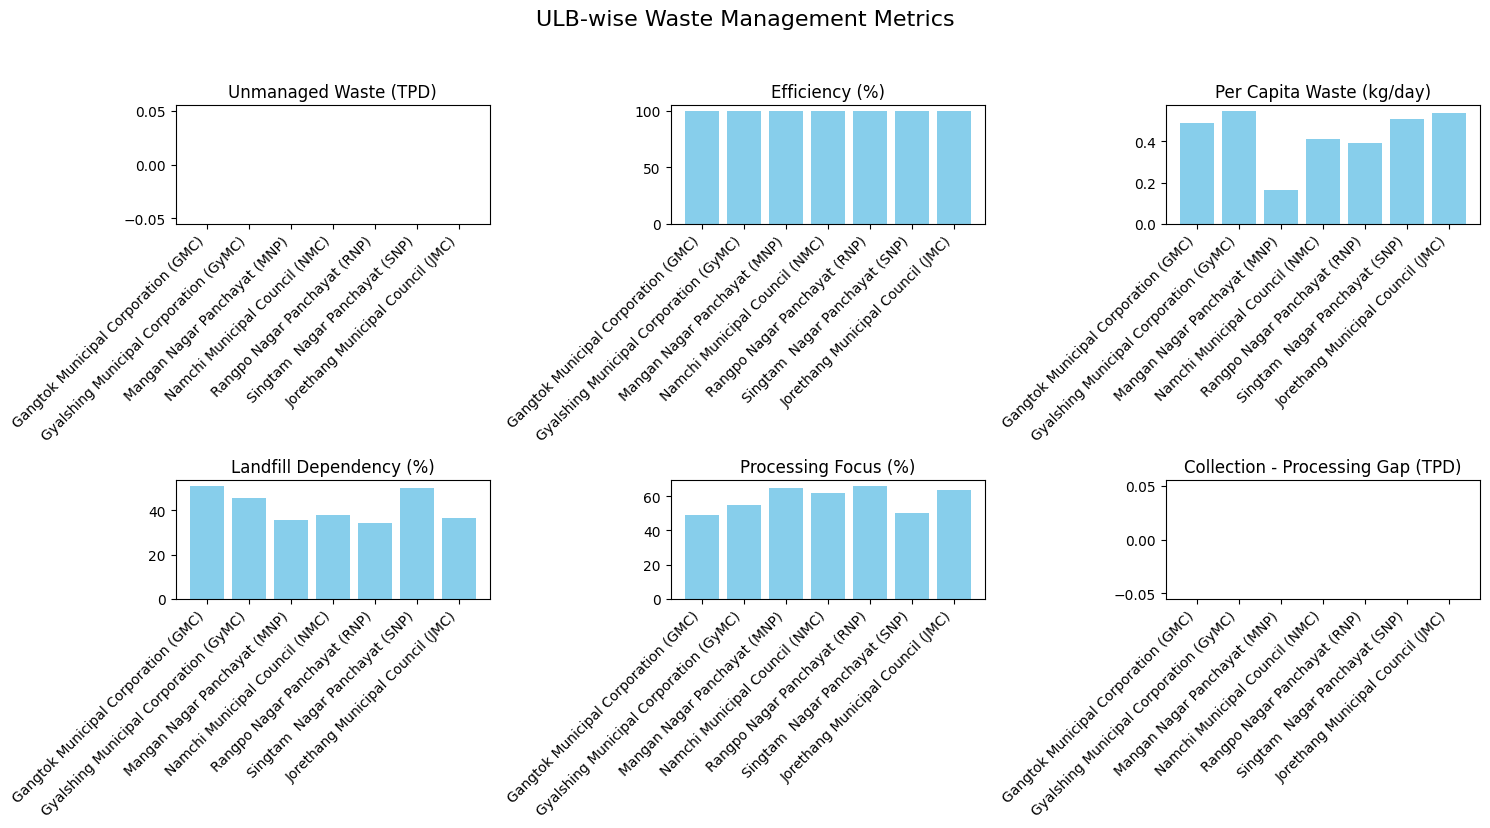

In [21]:
metrics = [
    'Unmanaged Waste (TPD)', 'Efficiency (%)', 'Per Capita Waste (kg/day)',
    'Landfill Dependency (%)', 'Processing Focus (%)', 'Collection - Processing Gap (TPD)'
]

plt.figure(figsize=(15, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(df['ULB'], df[metric], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(metric)
    plt.tight_layout()

plt.suptitle("ULB-wise Waste Management Metrics", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()